In [1]:
from io import BytesIO
from skimage import io
from PIL import Image, ImageDraw
from skimage import img_as_float
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import math

# Функция вывода изображения

In [2]:
def showImage(images, size = 15, colorMap = 'gray'):
    countImages = len(images)
    #size *= countImages
    pic_box = plt.figure(figsize=(size, size * countImages))
    for i, image in enumerate(images):
        pic_box.add_subplot(countImages, 2, i+1)
        plt.imshow(image)
        plt.set_cmap(colorMap)
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        plt.axis('off')
    plt.show()

# Функция сдвига

In [3]:
def get_dft_fftshift(image: np.ndarray):
    image_dft = cv2.dft(np.float32(image), flags = cv2.DFT_COMPLEX_OUTPUT)
    return np.fft.fftshift(image_dft)

# Функция для спектра изображения

In [53]:
def get_spectrum(image: np.ndarray, const = 0):
    image_fftshift = get_dft_fftshift(image)
    magnitude = cv2.magnitude(image_fftshift[:,:,0], image_fftshift[:,:,1])
    return np.log(magnitude + const)

# Функция для DFT и Magnityde

In [5]:
def get_dft_magnitude(image: np.ndarray):
    image_dft = cv2.dft(image, flags = cv2.DFT_COMPLEX_OUTPUT)
    return cv2.magnitude(image_dft[:,:,0], image_dft[:,:,1])

# Функция нахождения расстояния между точками

In [6]:
def get_distance(a, b, c, d):
    return math.sqrt((a - c) * (a - c) + (b - d) * (b - d))

# Функция dft(inverse) и magnitude

In [7]:
def get_dft_inverse_magnitude(image: np.ndarray):
    inverse_dft = cv2.dft(image, cv2.DFT_INVERSE)   
    return cv2.magnitude(inverse_dft[:,:, 0], inverse_dft[:,:, 1])

## 1. Исходное изображение.

In [8]:
image_srs= cv2.imread('3.jpg', 0)

## 2. Спектр изображения

In [9]:
image_spectrum = get_spectrum(image_srs)

# Исходное изображение и его спектр

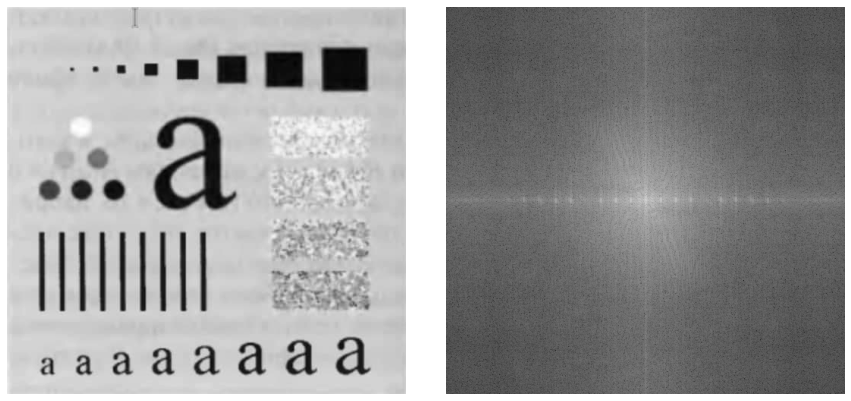

In [10]:
showImage([image_srs, image_spectrum])

## 3. Идеальный фильтр

In [11]:
width, height = image_srs.shape

In [12]:
image_dft_shift = get_dft_fftshift(image_srs)

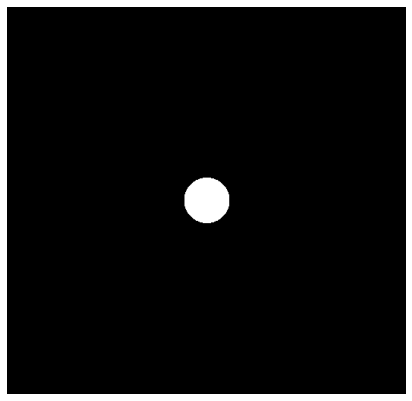

In [13]:
mask_I = np.zeros((width, height, 2))

d = 30

for i in range(width):
    for j in range(height):
        distance = int(get_distance(i, j, width / 2, height / 2) <= d)
        mask_I[i][j][0], mask_I[i][j][1]  = distance, distance

filtrated = image_dft_shift * mask_I

showImage([cv2.magnitude(mask_I[:,:,0], mask_I[:,:,1])])

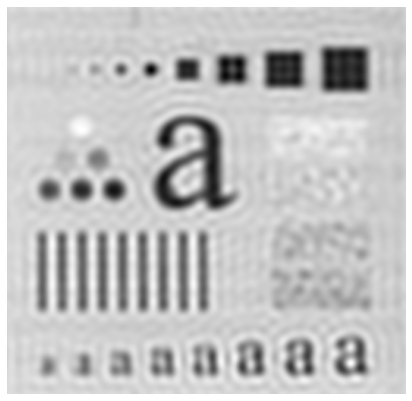

In [15]:
filtrated_dft_inverse_magnitude = get_dft_inverse_magnitude(filtrated)
showImage([filtrated_dft_inverse_magnitude])

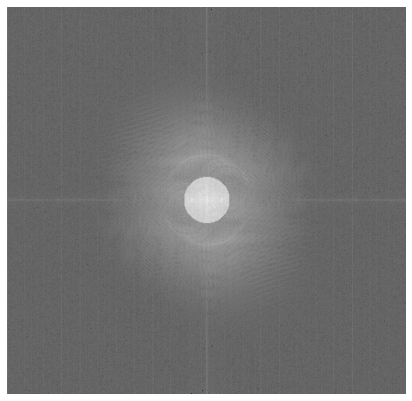

In [60]:
filtrated_dft_inverse_magnitude_spectr = get_spectrum(filtrated_dft_inverse_magnitude, const=0.001)
showImage([filtrated_dft_inverse_magnitude_spectr])

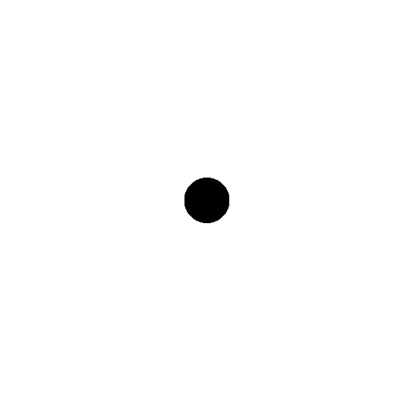

In [31]:
mask_I_rev = 1 - mask_I
showImage([cv2.magnitude(mask_I_rev[:,:,0], mask_I_rev[:,:,1])])

In [32]:
filtrated_I_rev = image_dft_shift * mask_I_rev

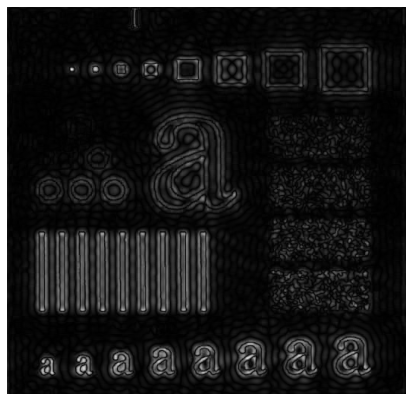

In [33]:
filtrated_I_rev_inverse_dft_magnitude = get_dft_inverse_magnitude(filtrated_I_rev)
showImage([filtrated_I_rev_inverse_dft_magnitude])

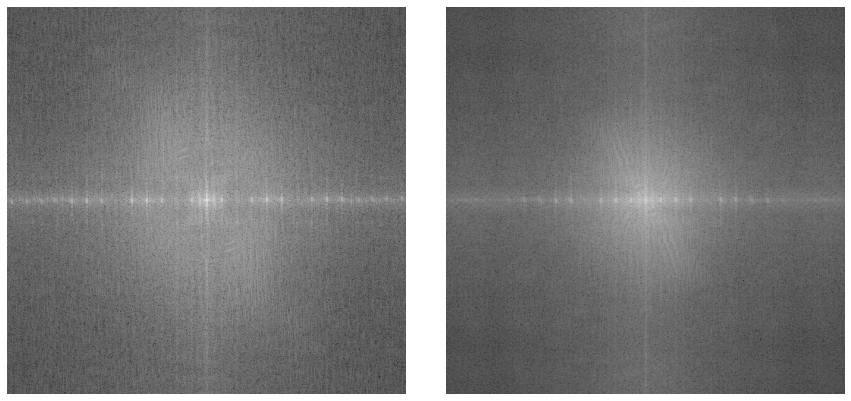

In [34]:
filtrated_I_rev_inverse_dft_magnitude_spectrum = get_spectrum(filtrated_I_rev_inverse_dft_magnitude)
showImage([filtrated_I_rev_inverse_dft_magnitude_spectrum, image_spectrum])

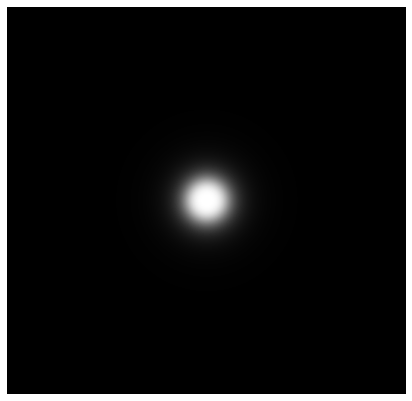

In [35]:
# Батерворт
width, height = image_srs.shape
mask_B = np.zeros((width, height ,2))
d = 30 
degree = 2 * 2

for i in range(width):
    for j in range(height):
        value = 1 / (1 + (get_distance(i, j, width/2, height/2) / d) ** degree)
        mask_B[i][j][0], mask_B[i][j][1] = value, value
        
filtrated_B = image_dft_shift * mask_B

showImage([cv2.magnitude(mask_B[:,:,0], mask_B[:,:,1])])

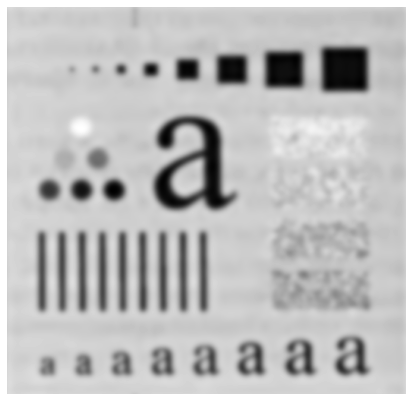

In [36]:
inverse_dft_magnitude = get_dft_inverse_magnitude(filtrated_B)
showImage([inverse_dft_magnitude])

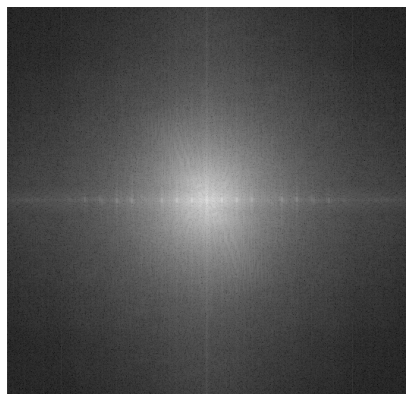

In [37]:
filtrated_B_spectrum = get_spectrum(inverse_dft_magnitude)
showImage([filtrated_B_spectrum])

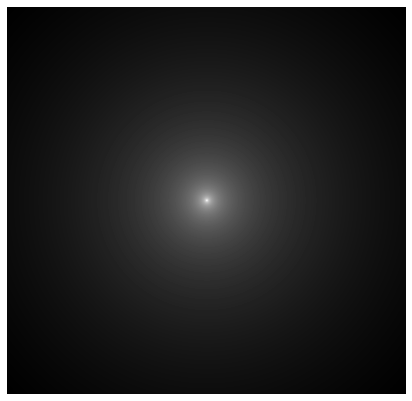

In [48]:
mask_B_rev = np.zeros((width, height, 2))
d = 15
degree = 1 / (2 * 2)

for i in range(width):
    for j in range(height):
        value = 1 / (1 + (get_distance(i, j, width/2, height/2) / d) ** degree)
        mask_B_rev[i][j][0], mask_B_rev[i][j][1] = value, value
        
filtrated_B_rev = image_dft_shift * mask_B_rev

showImage([cv2.magnitude(mask_B_rev[:,:,0], mask_B_rev[:,:,1])])

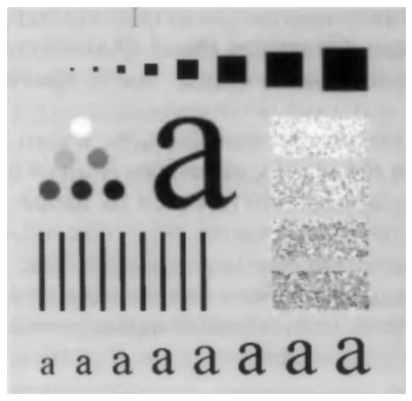

In [49]:
dft_inverse_magnitude = get_dft_inverse_magnitude(filtrated_B_rev)
showImage([dft_inverse_magnitude])

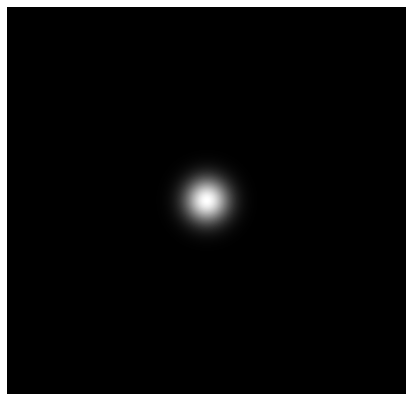

In [50]:
# Гаусов
mask_G = np.zeros((width, height ,2))
d = 20 

for i in range(width):
    for j in range(height):
        value = math.exp(-(get_distance(i, j, width/2, height/2) ** 2) / (2*d*d))
        mask_G[i][j][0], mask_G[i][j][1] = value, value
        
filtrated_G = image_dft_shift * mask_G

showImage([cv2.magnitude(mask_G[:,:,0], mask_G[:,:,1])])

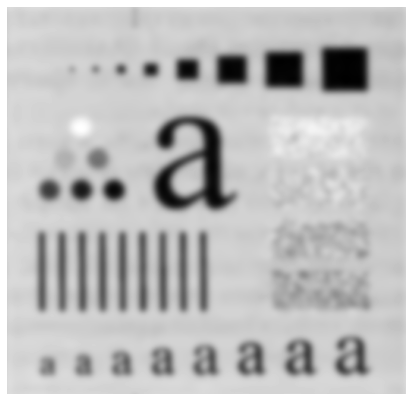

In [51]:
dft_inverse_magnitude = get_dft_inverse_magnitude(filtrated_G)
showImage([dft_inverse_magnitude])

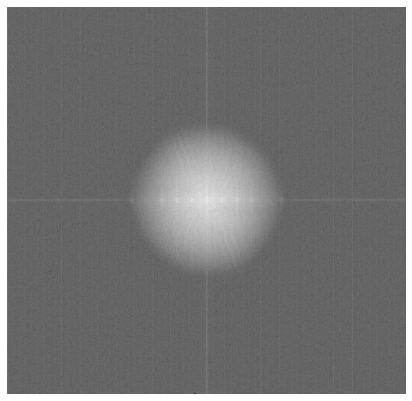

In [55]:
# не так отрабатывает
spectrum_G = get_spectrum(dft_inverse_magnitude, const=0.001)
showImage([spectrum_G])

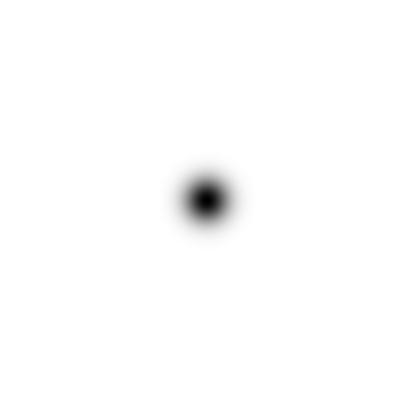

In [56]:
mask_G_rev = 1 - mask_G
filtrated_G_rev = image_dft_shift * mask_G_rev
showImage([cv2.magnitude(mask_G_rev[:,:,0], mask_G_rev[:,:,1])])

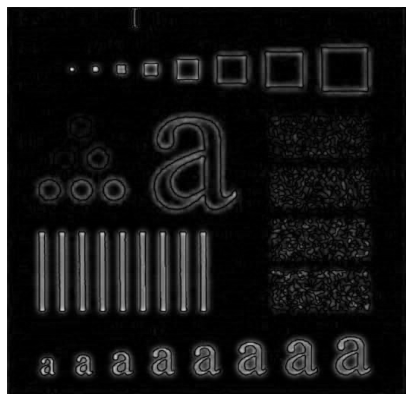

In [57]:
dft_inverse_magnitude = get_dft_inverse_magnitude(filtrated_G_rev)
showImage([dft_inverse_magnitude])

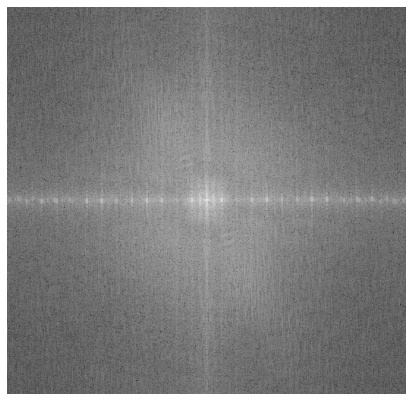

In [58]:
showImage([get_spectrum(dft_inverse_magnitude)])